In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
data=pd.read_csv('CC GENERAL.csv')
data.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6833,C17021,1091.744710,1.000000,729.47,566.52,162.95,0.000000,0.750000,0.583333,0.166667,0.000000,0,22,1500.0,2118.665123,612.918428,0.083333,12
2022,C12085,1193.434312,1.000000,689.40,689.40,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,3500.0,328.171066,328.045032,0.000000,12
6360,C16535,2714.362710,0.727273,50.62,50.62,0.00,4424.092060,0.083333,0.083333,0.000000,0.250000,6,1,7000.0,1651.122391,1349.297872,0.000000,12
1300,C11345,2894.348509,1.000000,657.71,310.70,347.01,3384.772636,1.000000,0.166667,0.916667,0.583333,17,21,3500.0,3166.765636,1006.614717,0.000000,12
139,C10145,2235.103331,1.000000,720.60,720.60,0.00,723.308724,1.000000,1.000000,0.000000,0.083333,1,12,2500.0,1061.292471,689.118919,0.000000,12


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
#on remplace les valeurs manquantes par la moyenne 
data.loc[(data["MINIMUM_PAYMENTS"].isnull()==True),'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].mean()
data.loc[(data["CREDIT_LIMIT"].isnull()==True),'CREDIT_LIMIT']=data['CREDIT_LIMIT'].mean()

In [15]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [18]:
col=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in col:    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=500)),Range]=1
    data.loc[((data[c]>500)&(data[c]<=1000)),Range]=2
    data.loc[((data[c]>1000)&(data[c]<=3000)),Range]=3
    data.loc[((data[c]>3000)&(data[c]<=5000)),Range]=4
    data.loc[((data[c]>5000)&(data[c]<=10000)),Range]=5
    data.loc[((data[c]>10000)),Range]=6

In [20]:
col=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']
for c in col:
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=0.1)),Range]=1
    data.loc[((data[c]>0.1)&(data[c]<=0.2)),Range]=2
    data.loc[((data[c]>0.2)&(data[c]<=0.3)),Range]=3
    data.loc[((data[c]>0.3)&(data[c]<=0.4)),Range]=4
    data.loc[((data[c]>0.4)&(data[c]<=0.5)),Range]=5
    data.loc[((data[c]>0.5)&(data[c]<=0.6)),Range]=6
    data.loc[((data[c]>0.6)&(data[c]<=0.7)),Range]=7
    data.loc[((data[c]>0.7)&(data[c]<=0.8)),Range]=8
    data.loc[((data[c]>0.8)&(data[c]<=0.9)),Range]=9
    data.loc[((data[c]>0.9)&(data[c]<=1.0)),Range]=10

In [21]:
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,0,2,1,1,9,2,0,1,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,5,5,4,3,10,0,0,0,3,3
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,0,5,2,2,10,10,10,0,0,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,1,5,0,2,7,1,1,0,1,0
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,0,3,2,1,10,1,1,0,0,0
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,0,3,3,3,10,7,0,6,0,0
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,...,0,6,5,1,10,10,10,10,0,10
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,...,0,3,2,2,10,10,0,10,0,0
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,...,0,5,2,1,10,4,1,3,0,0
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,...,0,6,3,1,6,2,2,0,0,0


In [22]:
col=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in col:
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=5)),Range]=1
    data.loc[((data[c]>5)&(data[c]<=10)),Range]=2
    data.loc[((data[c]>10)&(data[c]<=15)),Range]=3
    data.loc[((data[c]>15)&(data[c]<=20)),Range]=4
    data.loc[((data[c]>20)&(data[c]<=30)),Range]=5
    data.loc[((data[c]>30)&(data[c]<=50)),Range]=6
    data.loc[((data[c]>50)&(data[c]<=100)),Range]=7
    data.loc[((data[c]>100)),Range]=8

In [25]:
data.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
690,C10717,318.186198,1.0,3548.64,2949.37,599.27,0.000000,1.0,0.916667,1.000000,...,4,1,10,10,10,10,0,10,7,0
4315,C14434,57.937789,1.0,450.00,450.00,0.00,0.000000,0.5,0.500000,0.000000,...,1,1,10,5,5,0,0,3,2,0
1063,C11098,5961.863054,1.0,320.08,64.03,256.05,3134.417004,1.0,0.083333,0.916667,...,3,3,10,10,1,10,6,0,3,4
5191,C15336,833.541256,1.0,0.00,0.00,0.00,1422.637361,0.0,0.000000,0.000000,...,1,1,10,0,0,0,4,0,0,2
5154,C15299,5292.264382,1.0,0.00,0.00,0.00,3383.299741,0.0,0.000000,0.000000,...,2,3,10,0,0,0,7,0,0,2


In [26]:
data.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

In [27]:
data

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,6,1,1,0,1,0,2,1,1,10,10,0,9,0,5,2,0
8946,6,1,1,0,1,0,2,1,2,10,10,0,9,0,0,2,0
8947,6,1,1,0,1,0,2,1,1,9,9,0,7,0,3,1,0
8948,6,1,0,0,0,1,1,1,1,9,0,0,0,2,3,0,1


In [29]:
X=np.asarray(data)
X

array([[12,  1,  1, ...,  0,  1,  0],
       [12,  4,  0, ...,  3,  0,  1],
       [12,  3,  2, ...,  0,  3,  0],
       ...,
       [ 6,  1,  1, ...,  3,  1,  0],
       [ 6,  1,  0, ...,  3,  0,  1],
       [ 6,  1,  3, ...,  0,  5,  1]], dtype=int64)

In [35]:
#on normalise les données 
norm=StandardScaler()
X=norm.fit_transform(X)
print(X[1:4])
print(X.shape)

[[ 0.36067954  1.29798329 -1.18015543 -0.8021931  -0.87140518  2.38240682
   1.03934535  1.29376456  1.35525141  0.4721552  -1.26499436 -0.70895058
  -0.93927114  0.69031748  0.45299851 -1.09971241  0.12597818]
 [ 0.36067954  0.53915185  0.30290987  0.77280487 -0.87140518 -0.78662906
   1.03934535 -0.26090687  0.33835838  0.4721552   1.20192932  2.51568108
  -0.93927114 -0.70813011 -0.54119881  0.25898804 -0.69462206]
 [ 0.36067954  0.53915185  1.04444252  1.56030386 -0.87140518 -0.15282189
   1.03934535 -1.81557831  0.33835838 -0.85309748 -1.01830199 -0.38648742
  -0.93927114 -0.24198091 -0.54119881 -0.64681226  0.12597818]]
(8950, 17)


In [41]:
#methode d'elbow
vec=[]
for i in range(1,10):
    kmean=KMeans(i)
    kmean.fit(X)
    vec.append(kmean.inertia_)

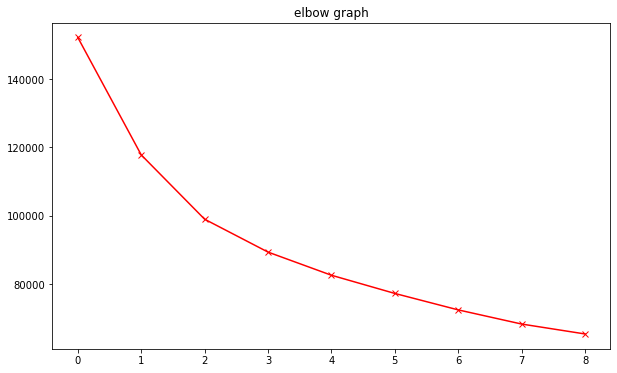

In [43]:
plt.figure(figsize=(10,6))
plt.title('elbow graph')
plt.plot(vec,'rx-');

In [46]:
kmean=KMeans(2)
kmean.fit(X)
labels=kmean.labels_
labels

array([0, 0, 1, ..., 1, 0, 1])

In [47]:
clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,0
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,0
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,1
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1,0
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,0


In [48]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

In [49]:
x, y = X_PCA[:, 0], X_PCA[:, 1]
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

In [54]:
df.sample(5)

,x,y,label
4989,-45.509908,-1.042552,0
8436,10.803988,38.549271,1
4535,32.151773,23.417502,1
5919,-9.060815,29.817003,0
8388,44.078083,-7.722083,1


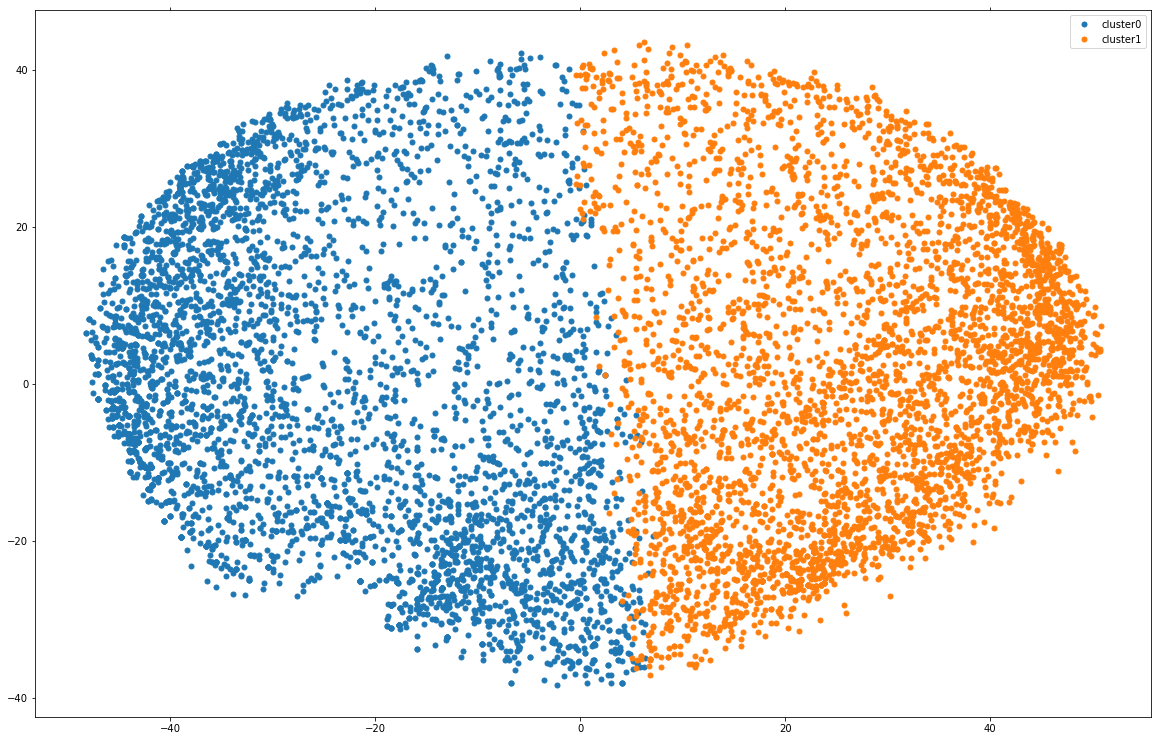

In [63]:
leg=["cluster0","cluster1"]
fig, ax = plt.subplots(figsize=(20, 13)) 
for i, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,label=leg[i])
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.legend()
plt.show()

In [64]:
kmean=KMeans(6)
kmean.fit(X)
labels=kmean.labels_
labels

array([0, 1, 4, ..., 5, 0, 4])

In [67]:
clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.sample(5)

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
4117,12,1,1,1,0,0,5,1,1,2,1,1,0,0,0,1,0,2
434,12,2,0,0,0,3,3,3,1,9,0,0,0,1,2,0,1,0
7458,12,4,3,1,3,3,5,4,2,10,10,2,8,3,0,3,2,3
5339,12,1,1,1,1,0,4,1,1,2,1,1,1,0,2,1,0,2
1052,12,1,2,1,2,0,3,3,1,6,5,1,5,0,10,4,0,5


In [68]:
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

In [70]:
df.sample(5)

,x,y,label
8868,-29.976034,-6.451145,0
7790,-6.477761,-34.827392,0
4689,-3.530812,-25.981448,2
8439,13.029976,-13.519190,5
1903,32.090947,33.013232,4


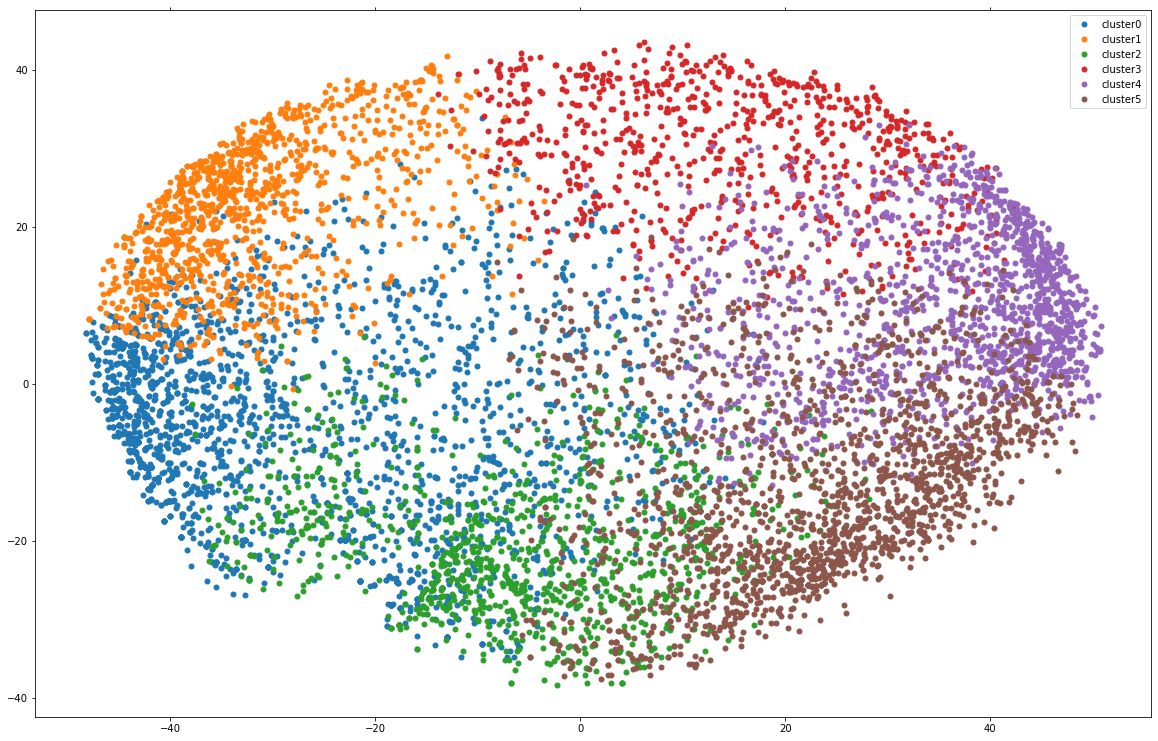

In [71]:
leg=["cluster0","cluster1","cluster2","cluster3","cluster4","cluster5"]
fig, ax = plt.subplots(figsize=(20, 13)) 
for i, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,label=leg[i])
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.legend()
plt.show()